#### **This notebook test for the model with reply and retweet**

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import sys
import os

import importlib

#### packages
import helper.strategy_helper as st
import helper.visualization as viz_hp
import helper.helper as hp
import helper.file_helper as file_hp
import config.config as config_hp
import helper.pandas_helper as pd_hp
import helper.stat_helper as stat_helper

#### **Save features**

In [ ]:
import helper.stat_helper as stat_hp
importlib.reload(stat_hp)

config = config_hp.config()
stats = config['STATS']

df_all_stat = pd.DataFrame()

features = [
            'quote_count',
           'like_count',
           'retweet_count',
           'reply_count',
           'reply_time_diff',
           # 'age_stats',
           'language_count',
           'mention_count',
           'hashtag_count',
           'url_count',
           'cosine',
            'original_tweet_reply_count'
              ]

print(len(features))

for metric in features:
    df_metric = pd.read_pickle(stats[metric])
    print(df_metric['tweet_label'].nunique())
    print(df_metric.columns)
    
    df_metric = df_metric.astype({
        'poster_tweetid': str,
        'tweet_label': int
    })
    if metric == 'quote_count':
        df_all_stat = df_metric
    else:
        df_all_stat = df_all_stat.merge(df_metric,
                     on=['poster_tweetid',
                         'tweet_label'
                        ]
                    )
df_all_stat.to_pickle(stats['all_features'])

11
2
Index(['poster_tweetid', 'mean_quote_count', 'std_quote_count',
       'min_quote_count', '25%_quote_count', '50%_quote_count',
       '75%_quote_count', 'max_quote_count', 'skew_quote_count',
       'kurtosis_quote_count', 'list_quote_count', 'range_quote_count',
       'iqr_quote_count', 'entropy_quote_count', 'tweet_label'],
      dtype='object')
2
Index(['poster_tweetid', 'mean_like_count', 'std_like_count', 'min_like_count',
       '25%_like_count', '50%_like_count', '75%_like_count', 'max_like_count',
       'skew_like_count', 'kurtosis_like_count', 'list_like_count',
       'range_like_count', 'iqr_like_count', 'entropy_like_count',
       'tweet_label'],
      dtype='object')
2
Index(['poster_tweetid', 'mean_retweet_count', 'std_retweet_count',
       'min_retweet_count', '25%_retweet_count', '50%_retweet_count',
       '75%_retweet_count', 'max_retweet_count', 'skew_retweet_count',
       'kurtosis_retweet_count', 'list_retweet_count', 'range_retweet_count',
       'iqr_r

In [ ]:
# df_all_stat['tweet_label'].unique()
df_all_stat.to_pickle(stats['all_features'])

In [42]:
df_all_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7732 entries, 0 to 7731
Columns: 116 entries, poster_tweetid to reply_count_by_age
dtypes: float64(100), int64(7), object(9)
memory usage: 6.9+ MB


#### **Model test**

21
Running the model

 **** random ****
[1 0]
here
110
After PCA shape  (7732, 110)
Xtrain:  6185
Xtrain shape:  (6185, 110)
Xtest:  1547
Ytrain:  6185
Ytest:  1547
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       773
           1       0.76      0.75      0.76       774

    accuracy                           0.76      1547
   macro avg       0.76      0.76      0.76      1547
weighted avg       0.76      0.76      0.76      1547

[[584 189]
 [190 584]]
Cross validation: mean 0.74 f1 with a standard deviation of 0.05


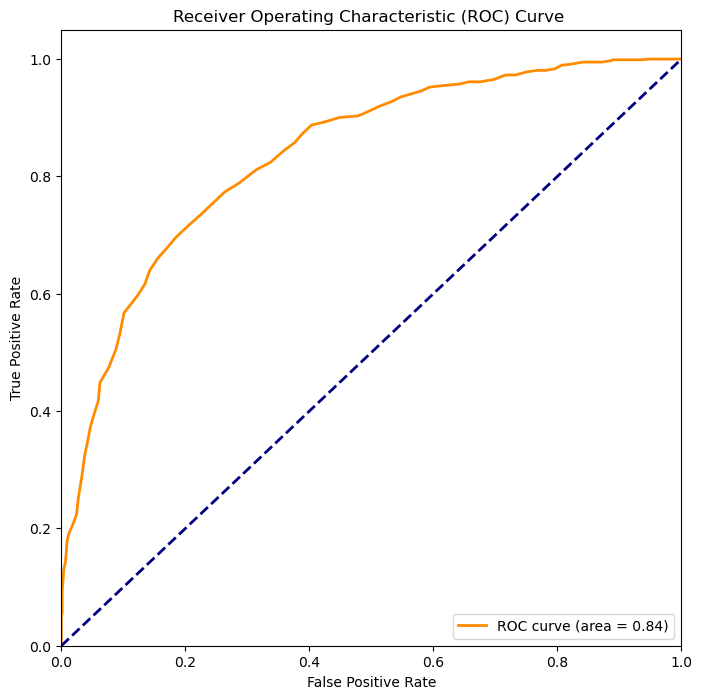

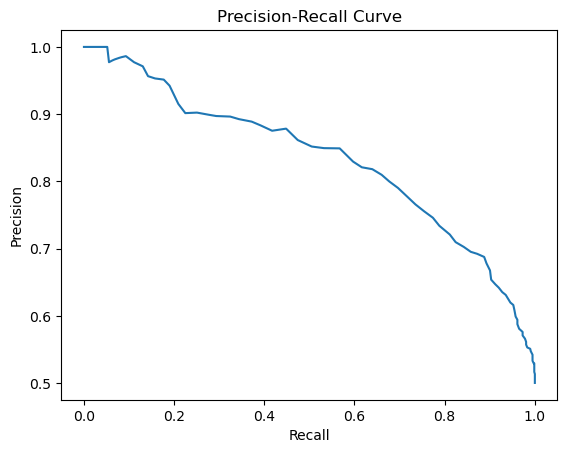

In [2]:
import helper.stat_helper as stat_hp
importlib.reload(stat_hp)

config = config_hp.config()
stats = config['STATS']

df_all_stat = pd.read_pickle(stats['all_features'])

list_features = [
    'list_quote_count',
    'list_like_count',
    'list_retweet_count',
    'list_reply_count',
    'list_reply_time_diff',
    # 'list_age_stats',
     'mad_diff_min',
    'cof_diff_min',
    'list_language_count',
    'list_mention_count',
    'list_hashtag_count',
    'list_url_count',
    'list_num_hashtags',
    'count_diff_min',
    'list_diff_min',
    'list_num_url',
    'list_cosine',
    'var_cosine',
    'var_diff_min',
    'var_mention_count',
    'var_num_hashtags',
    'reply_count_by_age',
    # 'org_reply_count'
]

print(len(list_features))


print('Running the model')
        
config = config_hp.config()
plot_path = config['PLOTS']
reply_plot_path = plot_path['reply_plot_path']
filename = os.path.join(reply_plot_path,
                        f'ROC_all_tweet_feature_without_pca.png')

df_return, roc, prf_1, prf_0, mean_score, std_score = stat_hp.run_model(df_all_stat,
                              columns_not_include=list_features,
                              model_type='random', 
                              pca=True,
                              y_column = 'tweet_label',
                              filename=None)


 **** logistic ****
[1 0]
here
110
After PCA shape  (7732, 110)
Xtrain:  6185
Xtrain shape:  (6185, 110)
Xtest:  1547
Ytrain:  6185
Ytest:  1547


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

0.749232012934519
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       773
           1       0.72      0.73      0.72       774

    accuracy                           0.72      1547
   macro avg       0.72      0.72      0.72      1547
weighted avg       0.72      0.72      0.72      1547

[[549 224]
 [211 563]]


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Cross validation: mean 0.72 f1 with a standard deviation of 0.03


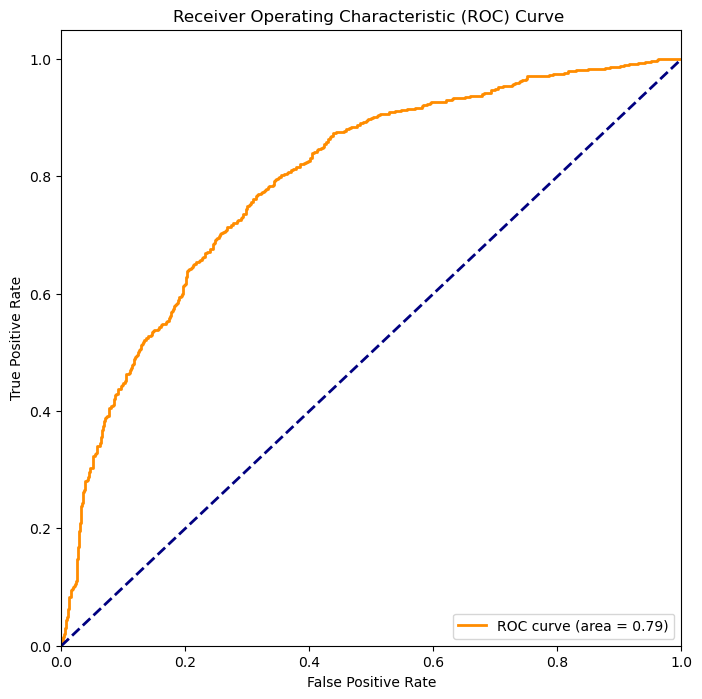

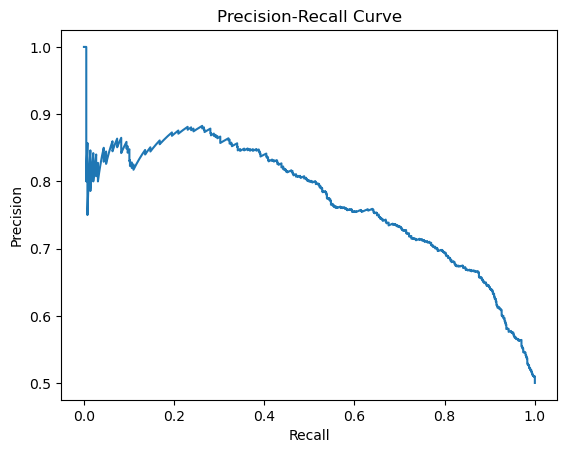

In [4]:
df_return, roc, prf_1, prf_0, mean_score, std_score = stat_hp.run_model(df_all_stat,
                              columns_not_include=list_features,
                              model_type='logistic', 
                              pca=True,
                              y_column = 'tweet_label',
                              filename=None)

In [4]:
# print(roc)
# print(prf)

In [6]:
# df_x = pd.read_pickle(stats['original_tweet_reply_count'])

In [5]:
# df_x.columns

In [5]:
# df_x.loc[df_x['tweet_label'] == 0]

In [3]:
# df_return, roc, prf = stat_hp.run_model(df_all_stat,
#                               columns_not_include=list_features,
#                               model_type='random', 
#                               pca=False,
#                               y_column = 'tweet_label',
#                               filename=None)

#### **Model test different features**

In [ ]:
# import helper.stat_helper as stat_hp
# importlib.reload(stat_hp)

# config = config_hp.config()
# stats = config['STATS']

# df_all_stat = pd.read_pickle(stats['all_features'])

In [16]:
set(df_all_stat.isnull().any())

{False}

In [ ]:
columns_not_include = [
    'list_quote_count',
    'list_like_count',
    'list_retweet_count',
    'list_reply_count',
    'list_reply_time_diff',
    # 'list_age_stats',
     'mad_diff_min',
    'cof_diff_min',
    'list_language_count',
    'list_mention_count',
    'list_hashtag_count',
    'list_url_count',
    'list_num_hashtags',
    'count_diff_min',
    'list_diff_min',
    'list_num_url',
    'list_cosine',
    'var_cosine',
    'var_diff_min',
    'var_mention_count',
    'var_num_hashtags',
    'reply_count_by_age',
    # 'org_reply_count'
]

print(len(columns_not_include))

# columns_not_include.extend(
#         ['poster_tweetid','tweet_label', 'replier_userid', 'replier_label'])
    
columns_to_keep = list(set(df_all_stat.columns) - set(columns_not_include))

diff_features = {'Reply Time': 'diff_min',
                 'Language Count': 'lang_count',
                 'Num of reply targeted tweet got': 'org_reply_count',
                 'Engagement metric': 'quote_count|like_count|retweet_count|reply_count',
                 'Reply similarity': 'cosine',
                 'Entites': 'mention_count|num_hashtags|num_url'
                }

print('Running the model')

df_test = df_all_stat[columns_to_keep]

all_result = []
for feature in diff_features:
    feat = diff_features[feature] + '|tweet_label|poster_tweetid'
        
    df_filtered = df_test.filter(regex=feat, axis=1)
    
    total_col = len(df_filtered.columns)
    
    print(total_col)
    
    df_return, roc, prf_1, prf_0, mean_score, std_score = stat_hp.run_model(df_filtered,
                                  columns_not_include=list_features,
                                  model_type='random', 
                                  pca=True,
                                  y_column = 'tweet_label',
                                  filename=None)
    
    all_result.append([feat, total_col, roc, prf_1[0], 
                       prf_1[1], prf_1[2],
                       prf_0[0], prf_0[1], prf_0[2],
                       mean_score, std_score
                      ])
    print(all_result)
    
(pd.DataFrame(data=all_result,
              columns=['reply_count', 'total_data',
                       'roc', 'precision_1', 'recall_1',
                       'f1_1', 'precision_0', 'recall_0',
                       'f1_0', 'mean_f1', 'std_f1']
             )
 
).to_pickle('different_feature_result.pkl.gz')

In [42]:
df_diff_feat = pd.read_pickle('./data/different_feature_result.pkl.gz')

df_diff_feat.head(1)

,feature,total_data,roc,precision_1,recall_1,f1_1,precision_0,recall_0,f1_0,mean_f1,std_f1
0,Reply Time,14,0.632348,0.607042,0.556848,0.580863,0.590203,0.639069,0.613665,0.56,0.04


#### **Train-Test with different data sizes**

In [ ]:
len(df_all_stat.loc[(df_all_stat['org_reply_count'] > 1000)])

In [9]:
import helper.stat_helper as stat_hp
importlib.reload(stat_hp)

config = config_hp.config()
stats = config['STATS']

df_all_stat = pd.read_pickle(stats['all_features'])

list_features = [
    'list_quote_count',
    'list_like_count',
    'list_retweet_count',
    'list_reply_count',
    'list_reply_time_diff',
    # 'list_age_stats',
     'mad_diff_min',
    'cof_diff_min',
    'list_language_count',
    'list_mention_count',
    'list_hashtag_count',
    'list_url_count',
    'list_num_hashtags',
    'count_diff_min',
    'list_diff_min',
    'list_num_url',
    'list_cosine',
    'var_cosine',
    'var_diff_min',
    'var_mention_count',
    'var_num_hashtags',
    'reply_count_by_age',
    # 'org_reply_count'
]

print(len(list_features))

21


In [10]:
config = config_hp.config()
balanced = config['BALANCED']

balanced_pos_conversation = balanced['balanced_pos_conversation']

df_pos = pd.read_pickle(balanced_pos_conversation)

print(df_pos.columns)

balanced_neg_conversation = balanced['balanced_neg_conversation']

df_neg = pd.read_pickle(balanced_neg_conversation)

print(df_neg.columns)

Index(['tweet_text', 'conversation_id', 'replier_tweetid', 'replier_userid',
       'poster_userid', 'poster_tweetid', 'tweet_time', 'tweet_language',
       'replier_label', 'year', 'campaign', 'tweet_label', 'tweet_time_year',
       'common', 'id', 'username'],
      dtype='object')
Index(['tweet_text', 'conversation_id', 'replier_tweetid', 'replier_userid',
       'poster_userid', 'poster_tweetid', 'tweet_time', 'tweet_language',
       'replier_label', 'year', 'campaign', 'tweet_label', 'tweet_time_year',
       'common', 'id', 'username'],
      dtype='object')


In [11]:
df_pos_replier = df_pos.loc[df_pos['replier_label'] == 1]

In [12]:
df_pos_grp = (df_pos_replier
              .groupby(['poster_tweetid'])['replier_tweetid']
              .size()
              .to_frame('count')
              .reset_index()
             )

In [13]:
df_pos_grp['count'].min()

5

In [5]:
# df_pos_grp['count'].max()

In [14]:
# df_all_stat.columns

df_all_stat['poster_tweetid'] = df_all_stat['poster_tweetid'].astype(str)
df_pos_grp['poster_tweetid'] = df_pos_grp['poster_tweetid'].astype(str)

In [ ]:
# max_reply = df_all_stat['org_reply_count'].max()

all_result = []
for i in range(5, 1001):
    df_pos_sample = df_pos_grp.loc[(df_pos_grp['count'] >= i)]
    df_all_stat
    
    df_flag1 = df_all_stat.loc[df_all_stat['poster_tweetid'].isin(df_pos_sample['poster_tweetid'])]
    total_flag1 = len(df_flag1)
    
    df_flag0 = df_all_stat.loc[df_all_stat['tweet_label'] == 0].sample(n=total_flag1, 
                                                                       random_state=42)
    df_sample = pd.concat([df_flag1, df_flag0],
                          ignore_index=True
                         )
    
    
    total_len = len(df_sample)
    
    print('Total length :', total_len)
    print('Total 1: ', total_flag1)
    
    df_return, roc, prf_1, prf_0, mean_score, std_score = stat_hp.run_model(df_sample,
                              columns_not_include=list_features,
                              model_type='random', 
                              pca=True,
                              y_column = 'tweet_label',
                              filename=None)
    
    all_result.append([i, total_len, roc, prf_1[0], 
                       prf_1[1], prf_1[2],
                       prf_0[0], prf_0[1], prf_0[2],
                       mean_score, std_score
                      ])
    print(all_result)
    

    if i == 6:
        break
        
(pd.DataFrame(data=all_result,
              columns=['reply_count', 'total_data',
                       'roc', 'precision_1', 'recall_1',
                       'f1_1', 'precision_0', 'recall_0',
                       'f1_0', 'mean_f1', 'std_f1']
             )
 
).to_pickle('data_siz_different_result.pkl.gz')

In [1]:
6185+1547

7732

#### **Visualize the f1**

In [2]:
file = 'data_siz_different_result_1.pkl.gz'


df_f1 = pd.read_pickle(file)

In [3]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reply_count  725 non-null    int64  
 1   total_data   725 non-null    int64  
 2   roc          725 non-null    float64
 3   precision_1  725 non-null    float64
 4   recall_1     725 non-null    float64
 5   f1_1         725 non-null    float64
 6   precision_0  725 non-null    float64
 7   recall_0     725 non-null    float64
 8   f1_0         725 non-null    float64
 9   mean_f1      725 non-null    float64
 10  std_f1       725 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 62.4 KB


In [19]:
df_f1.loc[df_f1['reply_count'] == 5]

,reply_count,total_data,roc,precision_1,recall_1,f1_1,precision_0,recall_0,f1_0,mean_f1,std_f1
0,5,7732,0.826517,0.761456,0.730918,0.745875,0.741615,0.771318,0.756175,0.74,0.04


In [12]:
# df_f1['reply_count'].unique()

df_5 = df_f1.loc[(df_f1['reply_count'] >=5) & (df_f1['reply_count'] <= 20)]

./diff_data_size_performance_reply_threshold.png
./diff_data_size_performance_reply_threshold.png


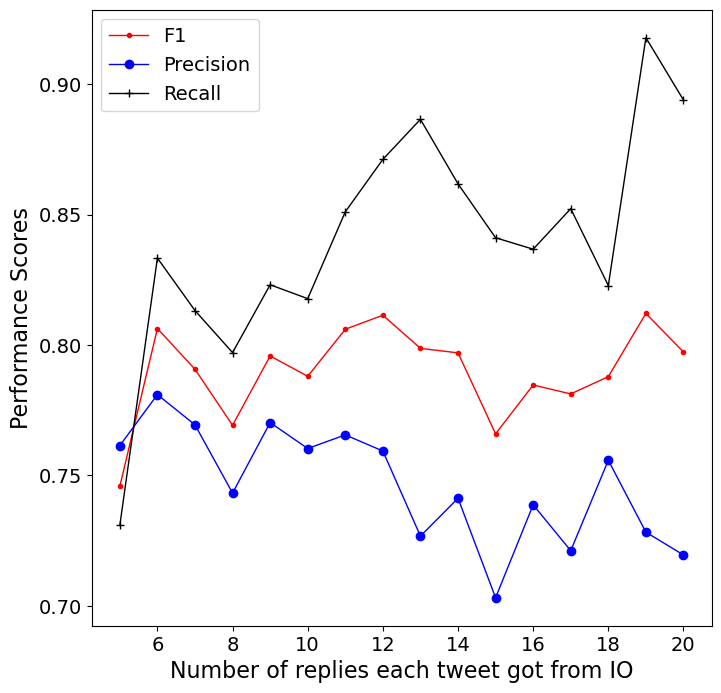

In [17]:
importlib.reload(viz_hp)

parameters = {
        'data': df_5,
        'fontsize': 14,
        'complementary': False,
        'columns': [
            {'column': 'f1_1',
             'label': 'F1',
            },
            {
            'column': 'precision_1',
             'label': 'Precision'
            },
            {
                'column': 'recall_1',
                'label': 'Recall',
            },
        ],
        'x': 'reply_count',
        # 'x_ticks': 'label',
        'xlabel': 'Number of replies each tweet got from IO',
        'ylabel': 'Performance Scores',
        'legend_location': 'upper left',
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': '.',
            'filename': 'diff_data_size_performance_reply_threshold.png'
        },
        'random_color': False
    }
    

viz_hp.line_plot(parameters)

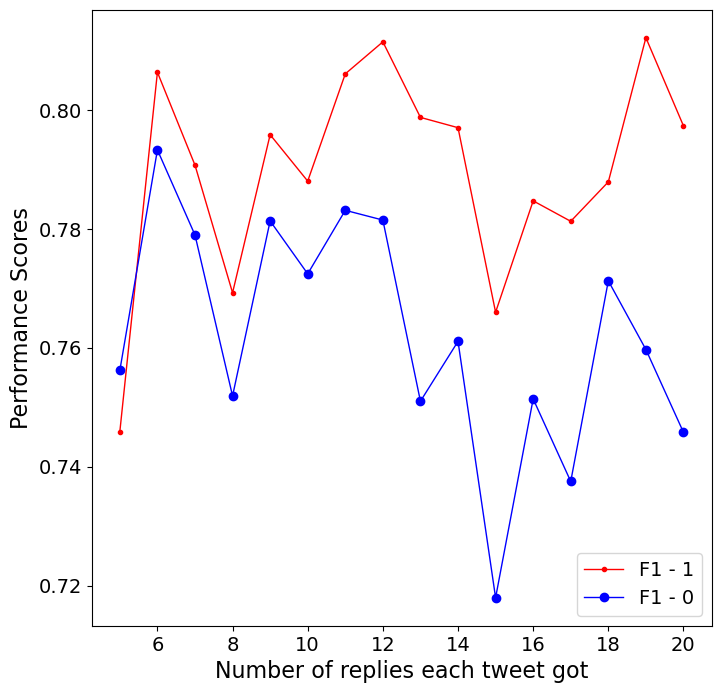

In [15]:
importlib.reload(viz_hp)

parameters = {
        'data': df_5,
        'fontsize': 14,
        'complementary': False,
        'columns': [
            {'column': 'f1_1',
             'label': 'F1 - 1',
            },{
            'column': 'f1_0',
             'label': 'F1 - 0'
            },
            
        ],
        'x': 'reply_count',
        # 'x_ticks': 'label',
        'xlabel': 'Number of replies each tweet got',
        'ylabel': 'Performance Scores',
        'legend_location': 'lower right',
        'log_yscale': False,
        'log_xscale': False,
        # 'save': {
        #     'path': '.',
        #     'filename': 'diff_data_size_f1_performance_reply_threshold.png'
        # },
        'random_color': False
    }
    

viz_hp.line_plot(parameters)

./diff_data_size.png
./diff_data_size.png


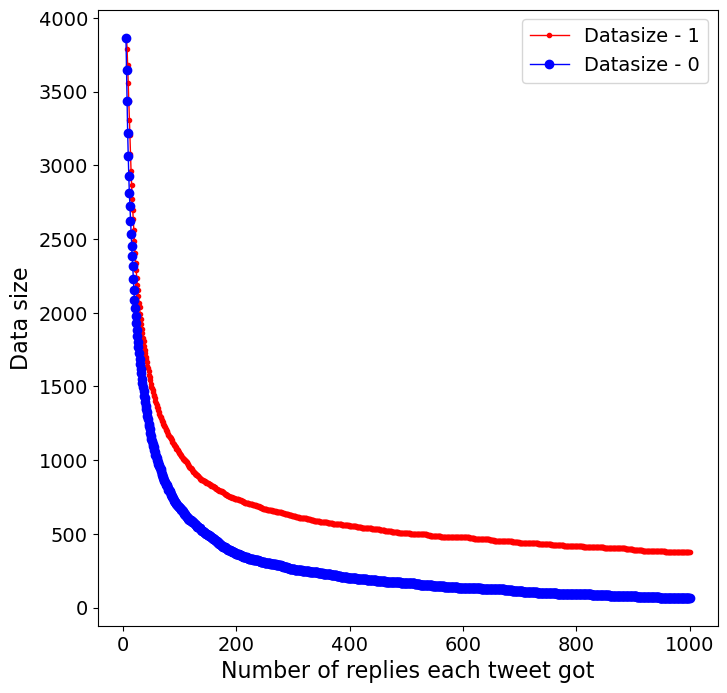

In [20]:
importlib.reload(viz_hp)

parameters = {
        'data': df_f1,
        'fontsize': 14,
        'complementary': False,
        'columns': [
            {
                'column': 'total_data_1',
                'label': 'Datasize - 1',
            },
            {
                'column': 'total_data_0',
                'label': 'Datasize - 0',
            }
        ],
        'x': 'reply_count',
        # 'x_ticks': 'label',
        'xlabel': 'Number of replies each tweet got',
        'ylabel': 'Data size',
        'legend_location': 'upper right',
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': '.',
            'filename': 'diff_data_size.png'
        },
        'random_color': False
    }
    

viz_hp.line_plot(parameters)